# Classify Movie Reviews as Positive or Negative

In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Preparation

In [2]:
((x_train,y_train),(x_test,y_test)) = imdb.load_data(num_words=10000)

In [3]:
len(x_train),len(x_test)

(25000, 25000)

In [4]:
print(x_train[0]) # Index of words from vocab dictionary made by keras

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
word_index = imdb.get_word_index()

In [6]:
index_words = dict([value,key] for (key,value) in word_index.items()) #Exchanged Key-Value Pairs

In [7]:
actual_review = ' '.join([index_words.get(index-3,'?') for index in x_train[0]]) #Formed the sentence (Stop Words Excluded by Keras)

# Vectorizing the Data

In [8]:
def vectorizeSentences(sentences,dim=10000):
    outputs = np.zeros((len(sentences),dim))
    
    for i,idx in enumerate(sentences):
        outputs[i,idx] = 1
        
    return outputs

In [9]:
x_train = vectorizeSentences(x_train)   #Data is vectorized. If a word is present corresponding feature is 1 else 0.
x_test = vectorizeSentences(x_test)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# Model Architecture

In [12]:
from keras import models
from keras.layers import Dense

In [13]:
#Define Model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
#Compile Model
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Training and Validation

In [16]:
x_val = x_train[:5000]
x_train = x_train[5000:]

y_val = y_train[:5000]
y_train = y_train[5000:]

In [17]:
hist = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 158us/step - loss: 0.4782 - accuracy: 0.8107 - val_loss: 0.3914 - val_accuracy: 0.8450
Epoch 2/20
20000/20000 [==============================] - 3s 125us/step - loss: 0.2733 - accuracy: 0.9081 - val_loss: 0.2911 - val_accuracy: 0.8862
Epoch 3/20
20000/20000 [==============================] - 3s 132us/step - loss: 0.2083 - accuracy: 0.9267 - val_loss: 0.2746 - val_accuracy: 0.8898
Epoch 4/20
20000/20000 [==============================] - 3s 137us/step - loss: 0.1677 - accuracy: 0.9433 - val_loss: 0.2970 - val_accuracy: 0.8834
Epoch 5/20
20000/20000 [==============================] - 3s 134us/step - loss: 0.1441 - accuracy: 0.9512 - val_loss: 0.3636 - val_accuracy: 0.86040s - loss: 0.144
Epoch 6/20
20000/20000 [==============================] - 3s 127us/step - loss: 0.1225 - accuracy: 0.9584 - val_loss: 0.3019 - val_accuracy: 0.8876
Epoch 7/20
20000/20000 [=======================

# Visualization

In [18]:
h = hist.history

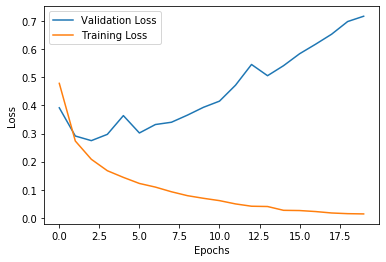

In [19]:
plt.plot(h['val_loss'],label = "Validation Loss")
plt.plot(h['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

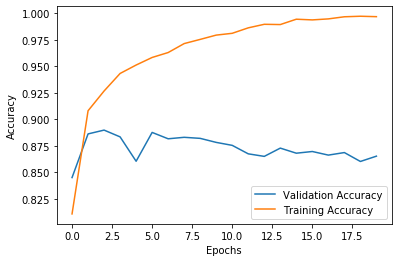

In [20]:
plt.plot(h['val_accuracy'],label = "Validation Accuracy")
plt.plot(h['accuracy'],label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model.evaluate(x_test,y_test)  # Gives Loss,Accuracy

25000/25000 [==============================] - 3s 135us/step


[0.7822607191967964, 0.8503999710083008]

In [22]:
model.evaluate(x_train,y_train)

20000/20000 [==============================] - 2s 123us/step


[0.006224263089615852, 0.9993500113487244]

In [23]:
#We are getting bad validation accuracy due to overfitting hence we should run the model only for 3 to 5 epochs

In [24]:
#Define Model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
#Compile Model
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
x_val = x_train[:5000]
x_train = x_train[5000:]

y_val = y_train[:5000]
y_train = y_train[5000:]

In [27]:
hist = model.fit(x_train,y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 5000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 148us/step - loss: 0.5230 - accuracy: 0.7913 - val_loss: 0.3893 - val_accuracy: 0.8702
Epoch 2/4
15000/15000 [==============================] - 2s 136us/step - loss: 0.3069 - accuracy: 0.9006 - val_loss: 0.3008 - val_accuracy: 0.8870
Epoch 3/4
15000/15000 [==============================] - 2s 134us/step - loss: 0.2209 - accuracy: 0.9273 - val_loss: 0.2759 - val_accuracy: 0.8908
Epoch 4/4
15000/15000 [==============================] - 2s 140us/step - loss: 0.1749 - accuracy: 0.9431 - val_loss: 0.2697 - val_accuracy: 0.8906


In [28]:
h = hist.history

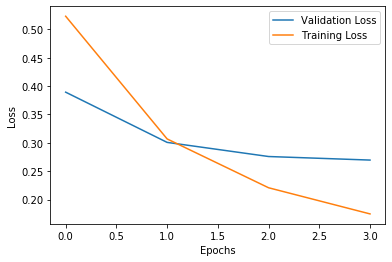

In [29]:
plt.plot(h['val_loss'],label = "Validation Loss")
plt.plot(h['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

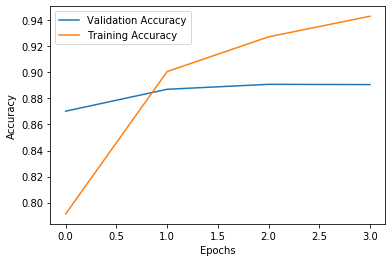

In [30]:
plt.plot(h['val_accuracy'],label = "Validation Accuracy")
plt.plot(h['accuracy'],label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
model.evaluate(x_test,y_test)  # Gives Loss,Accuracy

25000/25000 [==============================] - 3s 120us/step


[0.29174167350292207, 0.883080005645752]

In [32]:
model.evaluate(x_train,y_train) #Overfitting Reduced

15000/15000 [==============================] - 2s 128us/step


[0.13245134741067888, 0.9634000062942505]

In [33]:
y_pred = model.predict(x_test)

In [35]:
sentiment = []

In [37]:
for i in y_pred:
    if(i>=0.5):
        sentiment.append('Positive')
    else:
        sentiment.append('Negative')

In [40]:
y_pred[0],sentiment[0],y_test[0]

(array([0.23956573], dtype=float32), 'Negative', 0.0)